Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


# Exercício 1

In [1]:
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns


X = load_digits().data
y = load_digits().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Ajustando os parâmetros
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model1 = grid_search.best_estimator_

# Salvar o melhor modelo
with open('../models/model_tree.pkl', 'wb') as pickle_file:
    pk.dump(best_model1, pickle_file)

# Fazer previsões com o melhor modelo
y_pred_best = best_model1.predict(X_test)

# Avaliar a precisão do melhor modelo
print(f'Melhores Parâmetros: {grid_search.best_params_}')

accuracy = accuracy_score(y_test, y_pred_best)
print(f'Acurácia: {accuracy}')

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Melhores Parâmetros: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acurácia: 0.8666666666666667
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 32  2  0  0  0  0  0  1  2]
 [ 0  1 30  2  0  0  0  0  2  0]
 [ 0  3  0 32  0  0  1  0  0  1]
 [ 0  0  2  0 29  1  0  3  1  0]
 [ 0  0  0  0  1 33  0  0  0  2]
 [ 0  0  1  0  0  1 33  0  1  0]
 [ 0  0  0  2  1  0  0 32  0  1]
 [ 0  3  1  1  0  2  0  0 27  1]
 [ 0  2  0  2  0  2  1  0  1 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.78      0.86      0.82        37
           2       0.83      0.86      0.85        35
           3       0.82      0.86      0.84        37
           4       0.94      0.81      0.87        36
           5       0.85      0.92      0.88        36
           6       0.94      0.92      0.93        36
           7       0.91      0.89      0.90        36
           8       0.82      0.77      0.79        35
           9 

/home/codespace/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## sklearn.datasets.load_digits

- Classes: 10
- Samples per class: ~180
- Samples total: 1797
- Dimensionality: 64
- Features: integers 0-16

(1437, 64)
[ 0.  0.  8. 15. 12.  1.  0.  0.  0.  8. 13.  8. 12.  6.  0.  0.  0.  4.
  2.  0.  8.  6.  0.  0.  0.  0.  0.  1. 13.  2.  0.  0.  0.  0.  0.  9.
  7.  0.  0.  0.  0.  0.  5. 13.  0.  4.  4.  0.  0.  0. 10. 12.  9. 15.
 11.  0.  0.  0.  9. 16.  9.  7.  1.  0.]


<function matplotlib.pyplot.show(close=None, block=None)>

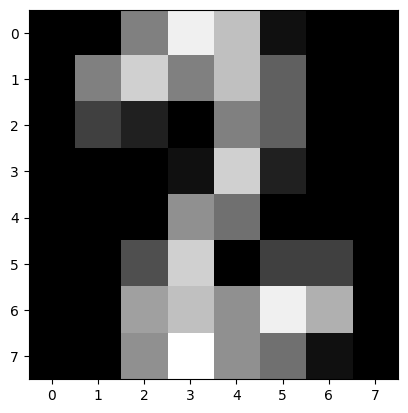

In [45]:
print(X_train.shape)
print(X_train[0])

plt.imshow(np.reshape(X_train[0], (8,8)), cmap=plt.cm.gray)
plt.show

# Exercício 2

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Ajustando os parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 15, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model2a = grid_search.best_estimator_

# Salvar modelo
with open('../models/model_random_forest.pkl', 'wb') as pickle_file:
    pk.dump(best_model2a, pickle_file)

y_pred_best2a = best_model2a.predict(X_test)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Acurácia: {accuracy_score(y_test, y_pred_best2a)}')

print(confusion_matrix(y_test, y_pred_best2a))
print(classification_report(y_test, y_pred_best2a))

Melhores Parâmetros: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia: 0.9888888888888889
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  1  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  1 35  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  1  0  0  0  0  0 34  0]
 [ 0  0  0  0  1  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.97      0.99        37
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       0.95      1.00      0.97        36
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       1.00      0.97      0.99   

## XGBoost

In [47]:
import xgboost as xgb

# Ajustando os parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 15, 25],
    'min_child_weight': [1, 3, 5]
    #'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'gamma': [0, 0.1, 0.2],
    #'reg_alpha': [0, 0.1, 1.0],
    #'reg_lambda': [0, 0.1, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

# Melhor modelo encontrado
best_model2b = grid_search.best_estimator_

# Salvar modelo
with open('../models/model_xgboost.pkl', 'wb') as pickle_file:
    pk.dump(best_model2b, pickle_file)

y_pred_best2b = best_model2b.predict(X_test)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Acurácia: {accuracy_score(y_test, y_pred_best2b)}')

print(confusion_matrix(y_test, y_pred_best2b))
print(classification_report(y_test, y_pred_best2b))

Melhores Parâmetros: {'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
Acurácia: 0.9833333333333333
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  1  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  2]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  1  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  1 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.95      0.97        37
           2       1.00      1.00      1.00        35
           3       0.97      0.95      0.96        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        36
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.95      1.00      0.97      

## Adaboost

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Ajustando os parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'estimator__max_depth': [5, 15, 25],
    'algorithm': ['SAMME']
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()), param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model2c = grid_search.best_estimator_

# Salvar modelo
with open('../models/model_adaboost.pkl', 'wb') as pickle_file:
    pk.dump(best_model2c, pickle_file)

y_pred_best2c = best_model2c.predict(X_test)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Acurácia: {accuracy_score(y_test, y_pred_best2c)}')

print(confusion_matrix(y_test, y_pred_best2c))
print(classification_report(y_test, y_pred_best2c))

Melhores Parâmetros: {'algorithm': 'SAMME', 'estimator__max_depth': 5, 'learning_rate': 1.0, 'n_estimators': 300}
Acurácia: 0.9777777777777777
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  1  0  0  2  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 35  0  0  1  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  2]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  1  0  0  0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35
           3       1.00      0.92      0.96        37
           4       0.97      1.00      0.99        36
           5       0.95      0.95      0.95        37
           6       1.00      1.00      1.00        36
           7       1.00      0.94      0.97        36
           8       0.92      1.00      

## Gradient Boosting

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

# Ajustando os parâmetros
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.01, 0.3],
    'max_depth': [25],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
    # 'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model2d = grid_search.best_estimator_

# Salvar modelo
with open('../models/model_gradient_boosting.pkl', 'wb') as pickle_file:
    pk.dump(best_model2d, pickle_file)

y_pred_best2d = best_model2d.predict(X_test)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Acurácia: {accuracy_score(y_test, y_pred_best2d)}')

print(confusion_matrix(y_test, y_pred_best2d))
print(classification_report(y_test, y_pred_best2d))

Melhores Parâmetros: {'learning_rate': 0.3, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia: 0.8944444444444445
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 34  1  0  0  0  0  0  0  2]
 [ 0  0 34  0  0  0  0  0  1  0]
 [ 0  0  0 32  1  0  0  0  0  4]
 [ 0  2  0  0 31  1  0  1  0  1]
 [ 0  1  0  0  0 33  1  1  0  0]
 [ 0  2  0  0  0  0 34  0  0  0]
 [ 0  1  0  0  0  0  0 34  0  1]
 [ 0  4  0  3  0  1  0  0 26  1]
 [ 1  1  0  3  1  0  0  2  0 28]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.76      0.92      0.83        37
           2       0.97      0.97      0.97        35
           3       0.84      0.86      0.85        37
           4       0.94      0.86      0.90        36
           5       0.94      0.92      0.93        36
           6       0.97      0.94      0.96        36
           7       0.89      0.94      0.92        36
           8       0.96 

Dentre os modelos testados, o Random Forest apresentou maior acurácia com os dados de teste, sendo o modelo adotado para a criação da WebAPI no Docker

# Exercício 3

Para ficar mais visível, vamos implementar a árvore de decisão com max_depth = 5

## Usando Gini

Acurácia usando Gini: 0.6333333333333333


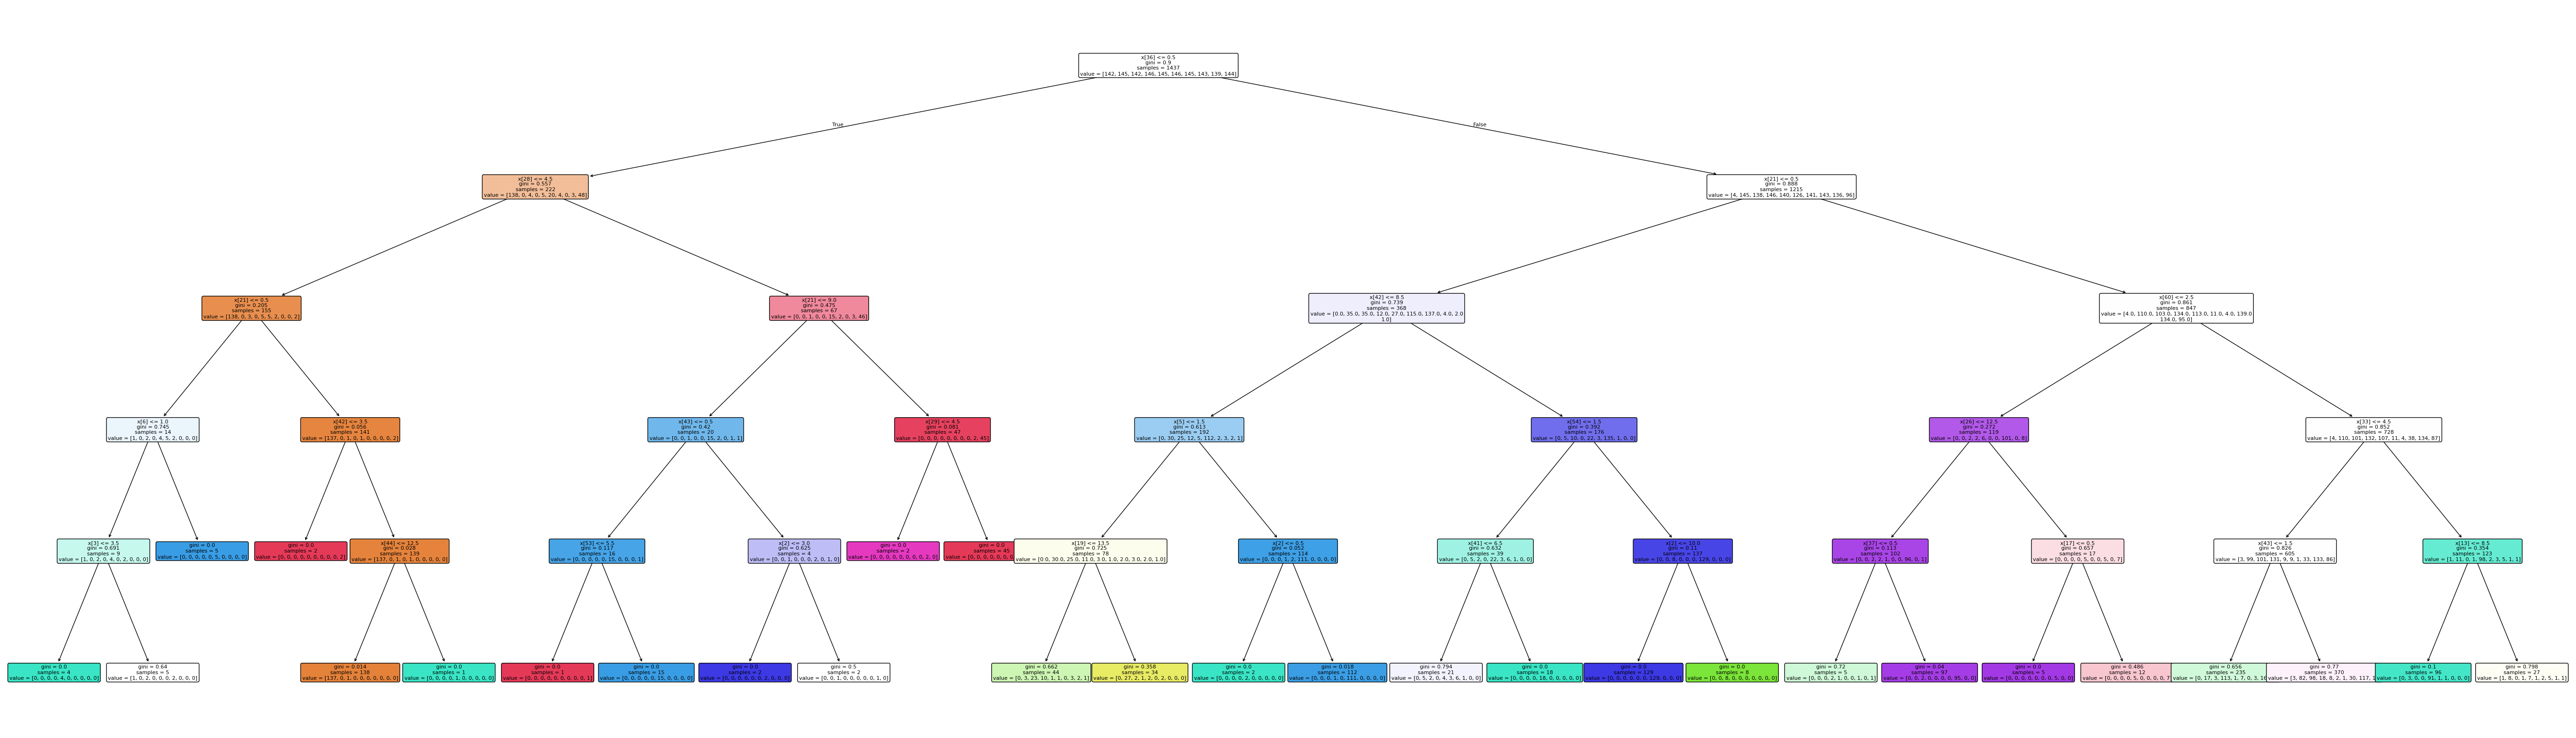

In [12]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model_gini = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='gini')
model_gini.fit(X_train, y_train)
y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Acurácia usando Gini: {accuracy_gini}')

plt.figure(figsize=(70,20))
plot_tree(model_gini,  filled=True, rounded=True, fontsize=8)
plt.show()

A impureza de Gini é avaliar a probabilidade de uam amostra ser classificada incorretamente

Podemos ver na árvore o seguinte comportamento:
- Gini igual a zero: É um ó puro onde todas as mostras pertencem à mesma classe
- Gini próximo de zero: indica que a maioria pertencem a uma mesma classe
- Gini próximo de um: indica que as amostras estão distribuidas entre várias classe (nó impuro)

Acurácia usando Entropia: 0.7916666666666666


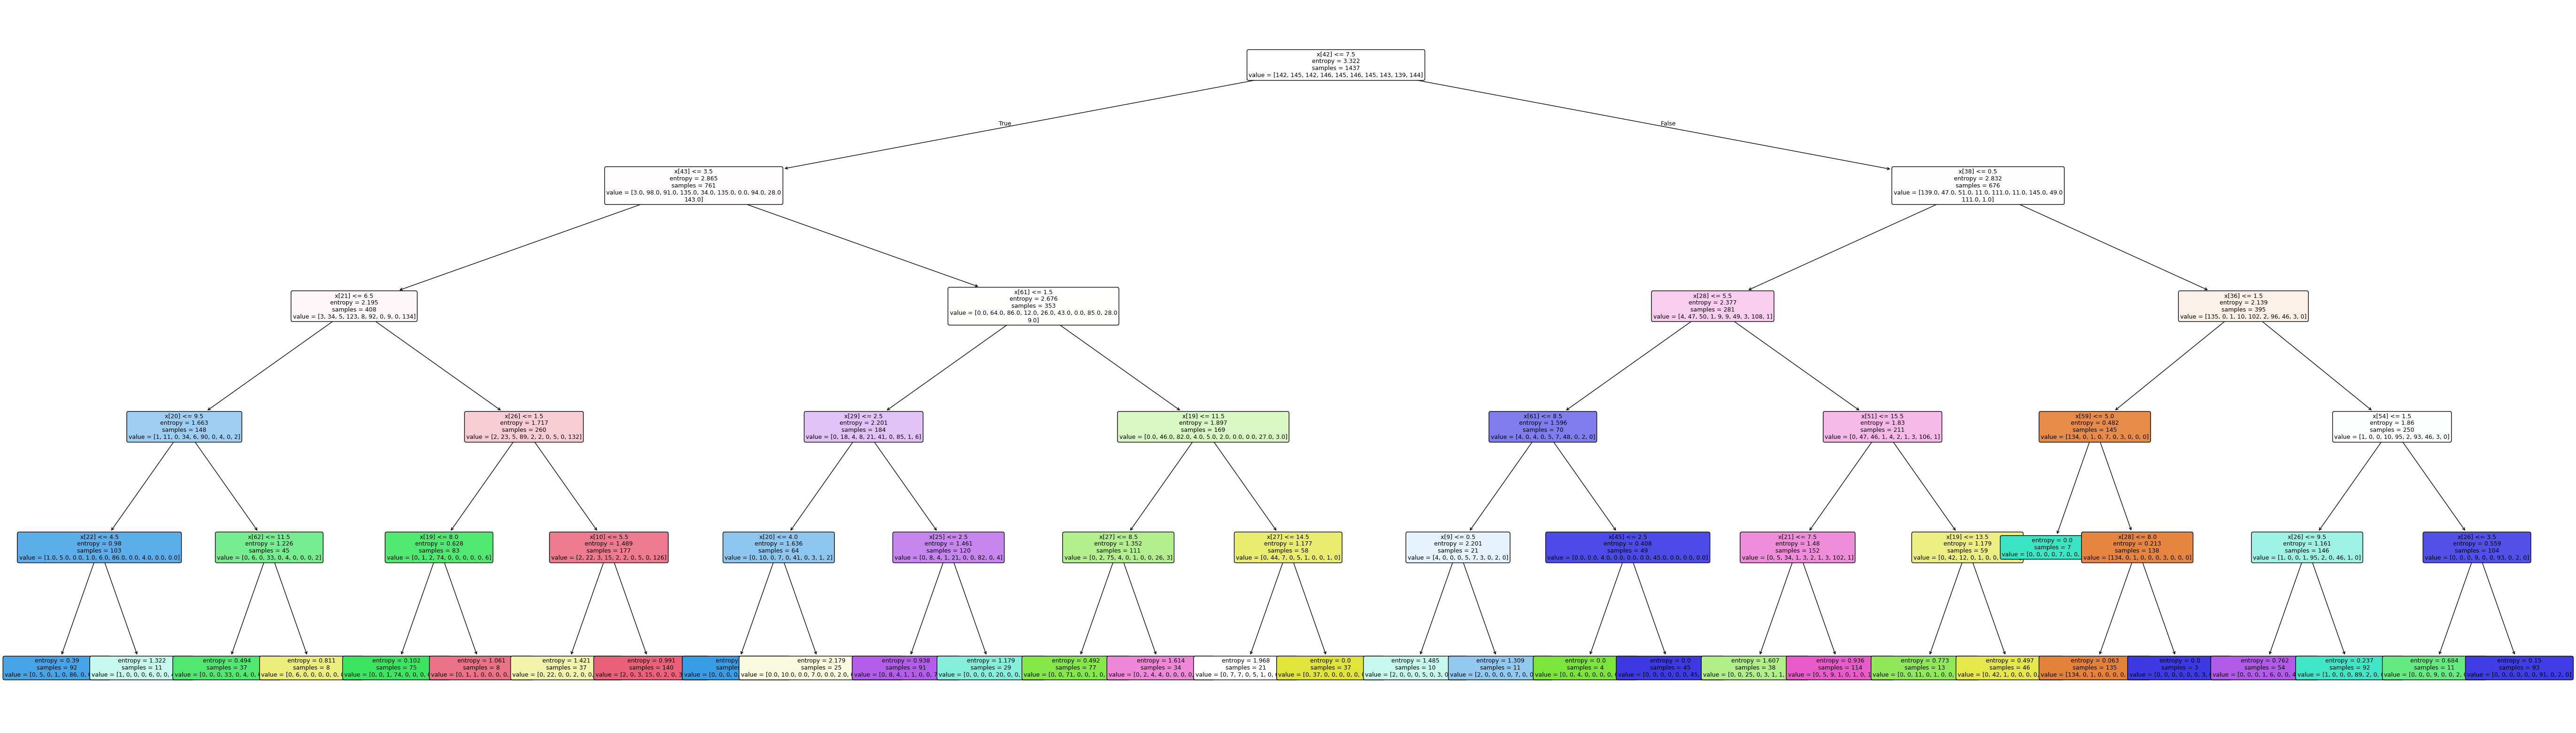

In [14]:
# Treinar o modelo usando o critério Entropia
model_entropy = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy')
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Acurácia usando Entropia: {accuracy_entropy}')

plt.figure(figsize=(70,20))
plot_tree(model_entropy,  filled=True, rounded=True, fontsize=9)
plt.show()

A entropia avalia a quantidades de divisões dos nós como métrica da impureza.

Podemos ver na árvore o seguinte comportamento:
- Entropy igual a zero: É um ó puro onde todas as mostras pertencem à mesma classe
- Entropy próximo de zero: indica que a maioria pertencem a uma mesma classe
- Entropy próximo de um: indica que as amostras estão distribuidas entre várias classe com maior incerteza

# Exercício 4

- Arquivo Dockerfile criado
- Configurada as depedência no arquivo requirements.txt
- Ambiente de execução configurado
- Criada a imagem docker
- Imagem docker executado

Docker criado: 
```
docker build -t imagem-docker .
```


Docker executado: 
```
docker run -p 8000:8000 imagem-docker
```

Para iniciar e finalizar o docker
```
docker start <container_id>
docker stop <container_id>
```

# Exercício 5

- Criado o arquivo main.py usando a bilbioteca FastAPI
- Foi utlizado o modelo Random Forest, entre os testados no exercício 2
- Criado o método POST /predict que recebe um vetor de float e retorna a predição 
- O método POST recebe um arquivo PNG e trata a imagems (redimensionalizando 8x8 e tornando em cinza de 0 a 16)
- Configurada a porta 8000 na aplicação que está disponibilizada no docker
- API executando com sucesso no docker
- Acesso a porta 8000 testada com sucesso
- Docker em execução como WebAPI. Servço disponibilizado na porta 8000 do servidor (que redireciona para a porta 8000 da aplicação dentro do docker)
- Em ambiente de produção seria necessário subir o docker e inicializar (docker start) e finalizar (docker stop) quando necessário


## Testando o modelo que será implementado no main.py para rodar no Docker

In [50]:
import math
import pickle as pk
import io
import numpy as np
from PIL import Image, ImageOps 

print('Carregando imagem positiva')

with open('../imagens/imagem_positiva.png', "rb") as file:
    contents = file.read()
    img = Image.open(io.BytesIO(contents))
    img = img.resize((8,8))
    img_gray = np.array(ImageOps.grayscale(img) ) * (16/255)
    img_gray = img_gray.astype(int).astype(float)

    vec = img_gray.reshape(1,-1)
    print('Vetor:', vec.shape)
    print(vec)

    with open("model_random_forest.pkl", "rb") as f:
        model = pk.load(f)
        predict = model.predict(vec)

    print('Predição:', predict)

Carregando imagem positiva
Vetor: (1, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 16. 10. 16.  5.  0.  0.  3.
  16.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]]
Predição: [0]


In [51]:
print('Carregando imagem positiva com ruido')

with open('../imagens/imagem_positiva_ruido.png', "rb") as file:
    contents = file.read()
    img = Image.open(io.BytesIO(contents))
    img = img.resize((8,8))
    img_gray = np.array(ImageOps.grayscale(img) ) * (16/255)
    img_gray = img_gray.astype(int).astype(float)

    vec = img_gray.reshape(1,-1)
    print('Vetor:', vec.shape)
    print(vec)

    with open("model_random_forest.pkl", "rb") as f:
        model = pk.load(f)
        predict = model.predict(vec)

    print('Predição:', predict)

Carregando imagem positiva com ruido
Vetor: (1, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 16.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 15.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 11.  0.  0.  0.]]
Predição: [0]


In [52]:
print('Carregando imagem negativa')

with open('../imagens/imagem_negativa.png', "rb") as file:
    contents = file.read()
    img = Image.open(io.BytesIO(contents))
    img = img.resize((8,8))
    img_gray = np.array(ImageOps.grayscale(img) ) * (16/255)
    img_gray = img_gray.astype(int).astype(float)

    vec = img_gray.reshape(1,-1)
    print('Vetor:', vec.shape)
    print(vec)

    with open("model_random_forest.pkl", "rb") as f:
        model = pk.load(f)
        predict = model.predict(vec)

    print('Predição:', predict)

Carregando imagem negativa
Vetor: (1, 64)
[[15. 11. 10.  5.  6.  5. 16. 13. 12.  0. 11.  9. 11.  5. 12. 10.  9. 15.
  11.  5. 14. 12. 10.  6.  3.  6. 14. 15.  7.  0.  0. 12.  9. 10.  4.  9.
   6.  9.  3.  9.  9.  5.  9. 12.  3.  3. 12. 12.  6. 10. 13. 10.  7.  2.
   7. 10.  3.  2. 13. 13. 12. 14. 14.  8.]]
Predição: [8]


# Exercício 6

- Implementado o notebook client.ipynb
- Foi utilizada a biblioteca requests para envio do POST com a imagem a ser analisada
- O algoritmo envia o arquivo PNG para a WebAPI
- Resultado apresentado no notebook client.ipynb